## By Mohammad Javad Taghavi


#### in this notebook some parts are for saving and loading my model to check some of numbers from my local computer images  ( they were handwrite )     you can skip them 

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
 (X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


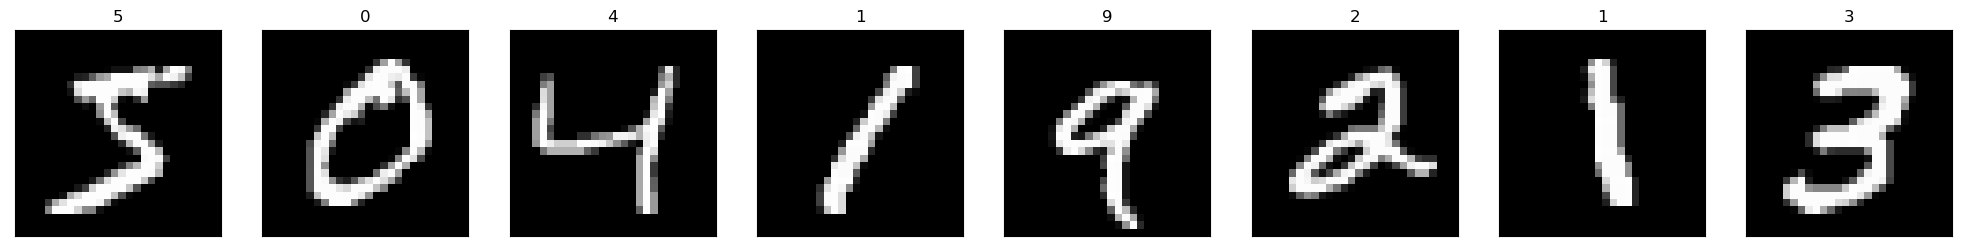

In [4]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

In [5]:
# normalize the data 255 is color 0 is black and 255 is white every other color is between them
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [7]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255


In [8]:
# units = 10 same as num_classes 
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/20
600/600 [==============================] - 7s 7ms/step - loss: 0.6274 - accuracy: 0.8417 - val_loss: 0.3624 - val_accuracy: 0.9054
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.3467 - accuracy: 0.9052 - val_loss: 0.3074 - val_accuracy: 0.9151
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.3099 - accuracy: 0.9145 - val_loss: 0.2896 - val_accuracy: 0.9190
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2926 - accuracy: 0.9184 - val_loss: 0.2793 - val_accuracy: 0.9212
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2822 - accuracy: 0.9217 - val_loss: 0.2753 - val_accuracy: 0.9222
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2752 - accuracy: 0.9231 - val_loss: 0.2731 - val_accuracy: 0.9250
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2700 - accuracy: 0.9252 - val_loss: 0.2705 - val_accuracy: 0.9233
Epoch 

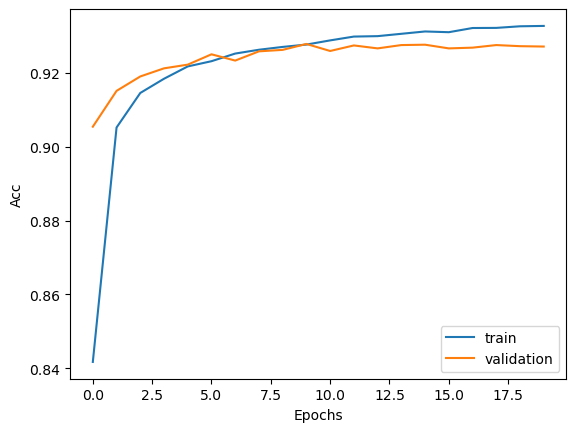

In [11]:
# callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

history = model.fit(X_train,y_train,
                   batch_size=100,
                   epochs=20,
                   validation_data=(X_test,y_test),
#                    callbacks=[callback],
                   shuffle=True)

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step
[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [8.09e-07 1.82e-12 2.15e-06 5.04e-03 2.05e-07 2.00e-05 1.51e-11 9.95e-01 1.35e-05 2.73e-04]]


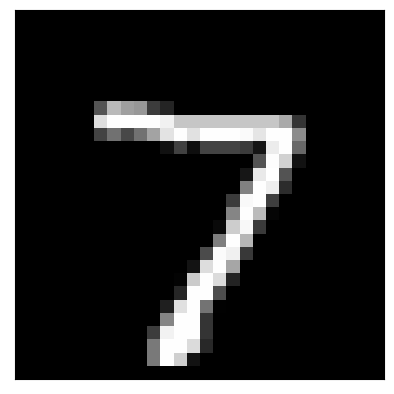

[[0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.61e-04 1.26e-06 9.92e-01 7.16e-05 3.53e-15 2.90e-03 4.47e-03 4.87e-19 3.72e-05 2.65e-15]]


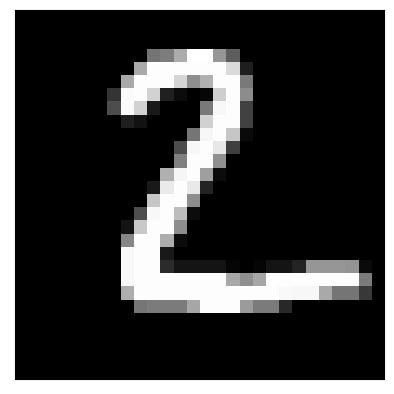

[[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.02e-06 9.80e-01 1.14e-02 2.55e-03 1.33e-04 7.66e-04 9.48e-04 3.82e-04 3.44e-03 2.19e-04]]


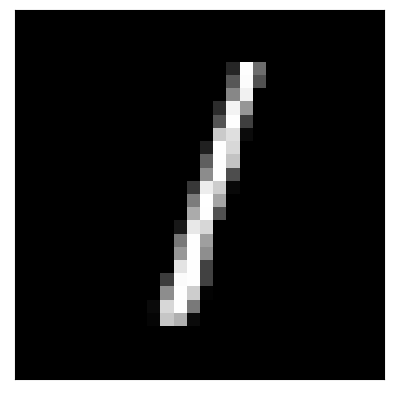

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 2.76e-12 2.28e-05 1.26e-06 1.41e-08 1.32e-05 5.79e-05 2.64e-06 5.24e-06 3.31e-06]]


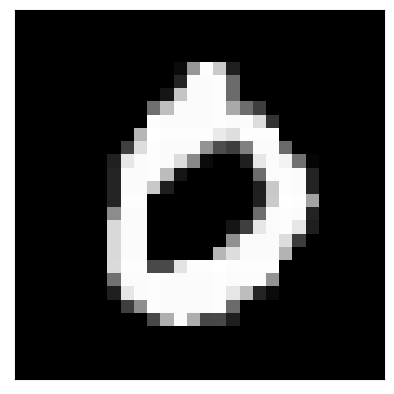

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [3.99e-04 6.36e-08 1.24e-03 1.76e-05 9.73e-01 6.90e-05 1.35e-03 1.99e-03 2.15e-03 2.00e-02]]


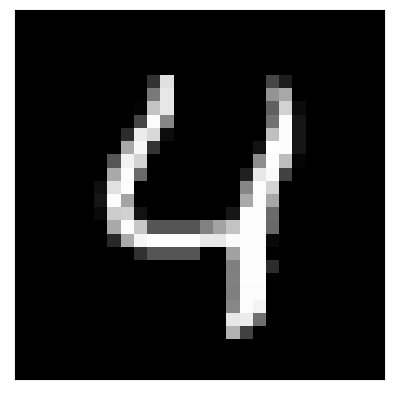

[[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [6.39e-08 9.91e-01 1.97e-03 1.26e-03 1.06e-05 3.75e-05 1.01e-05 3.35e-03 2.09e-03 3.11e-04]]


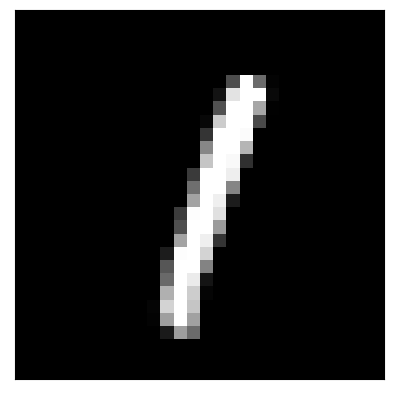

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [8.10e-07 1.84e-08 2.31e-07 7.39e-05 9.86e-01 1.71e-03 1.10e-05 8.22e-04 5.01e-03 6.32e-03]]


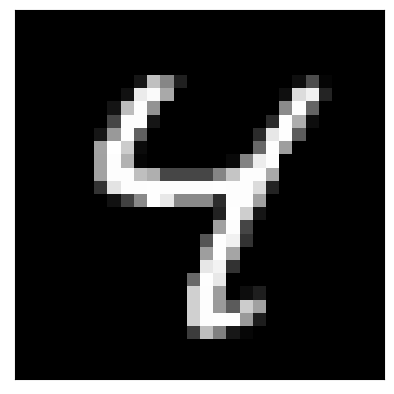

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00]
 [6.35e-09 4.01e-03 8.92e-05 3.19e-04 6.52e-03 4.44e-03 2.89e-06 2.80e-04 9.61e-04 9.83e-01]]


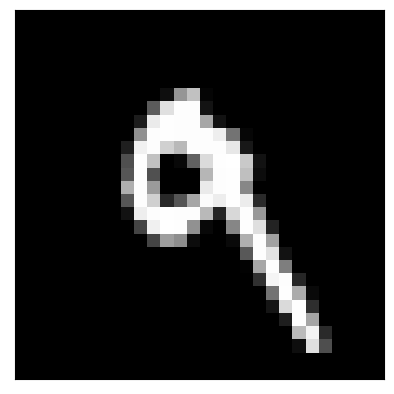

In [12]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2,linewidth=200)

for i in range(8):
    print(np.array([y_test[i], y_pred[i]]))
    
    plt.figure()
    plt.imshow(X_test[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [8.09e-07 1.82e-12 2.15e-06 5.04e-03 2.05e-07 2.00e-05 1.51e-11 9.95e-01 1.35e-05 2.73e-04]]


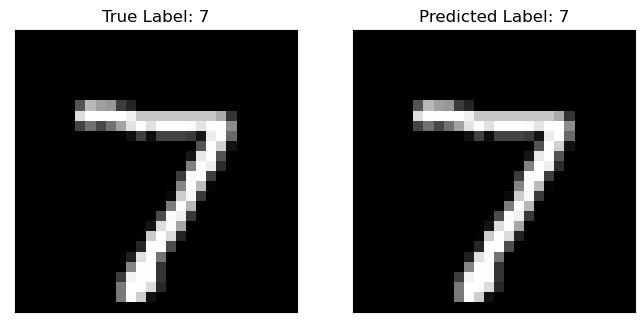

[[0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.61e-04 1.26e-06 9.92e-01 7.16e-05 3.53e-15 2.90e-03 4.47e-03 4.87e-19 3.72e-05 2.65e-15]]


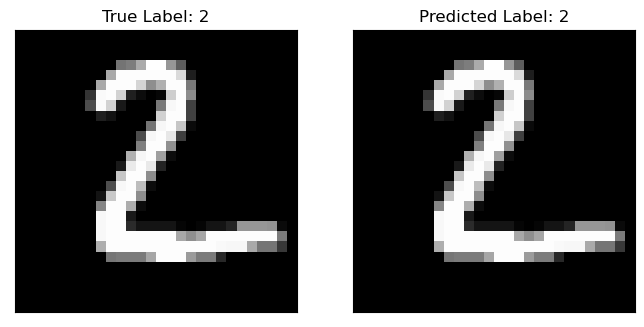

[[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.02e-06 9.80e-01 1.14e-02 2.55e-03 1.33e-04 7.66e-04 9.48e-04 3.82e-04 3.44e-03 2.19e-04]]


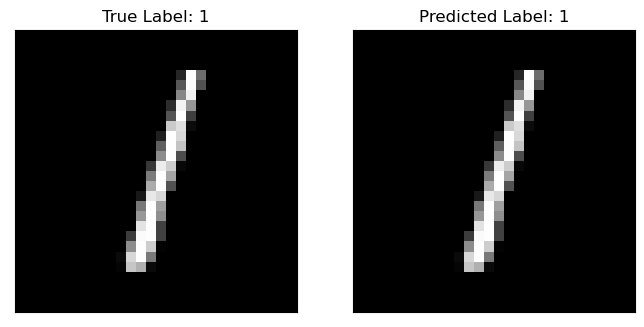

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 2.76e-12 2.28e-05 1.26e-06 1.41e-08 1.32e-05 5.79e-05 2.64e-06 5.24e-06 3.31e-06]]


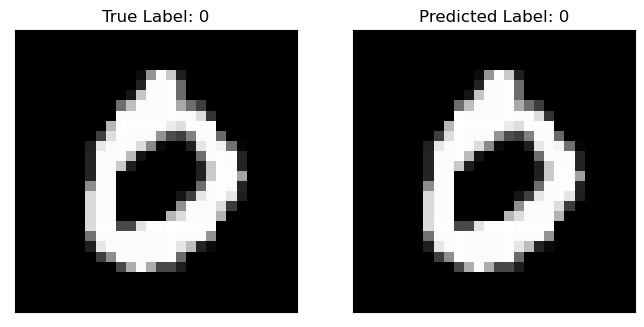

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [3.99e-04 6.36e-08 1.24e-03 1.76e-05 9.73e-01 6.90e-05 1.35e-03 1.99e-03 2.15e-03 2.00e-02]]


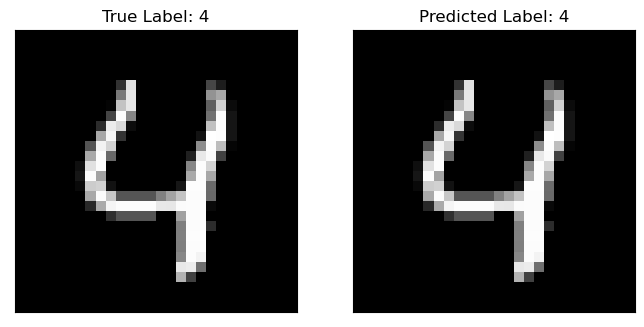

[[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [6.39e-08 9.91e-01 1.97e-03 1.26e-03 1.06e-05 3.75e-05 1.01e-05 3.35e-03 2.09e-03 3.11e-04]]


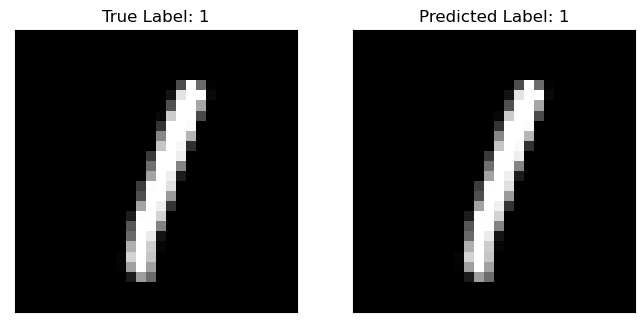

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [8.10e-07 1.84e-08 2.31e-07 7.39e-05 9.86e-01 1.71e-03 1.10e-05 8.22e-04 5.01e-03 6.32e-03]]


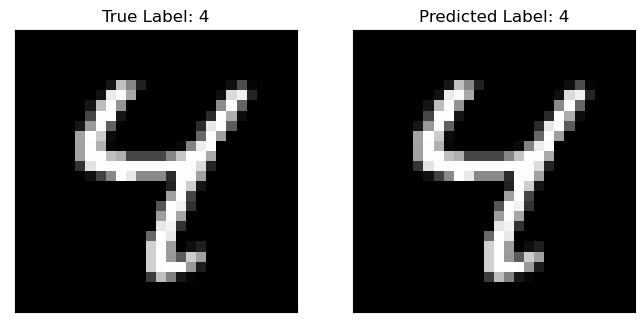

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00]
 [6.35e-09 4.01e-03 8.92e-05 3.19e-04 6.52e-03 4.44e-03 2.89e-06 2.80e-04 9.61e-04 9.83e-01]]


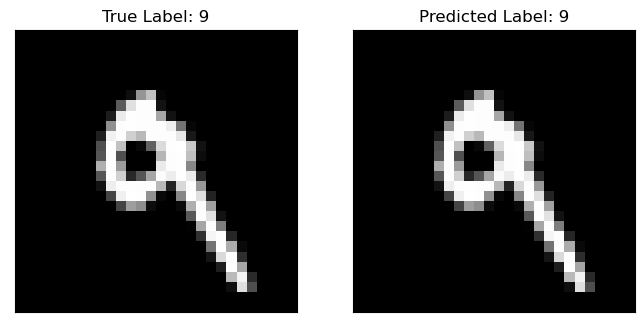

In [13]:
np.set_printoptions(precision=2, linewidth=200)

for i in range(8):
    # Print the y_test and y_pred for each example
    print(np.array([y_test[i], y_pred[i]]))

    # Display the image
    plt.figure(figsize=(8, 4))

    # Plot the true label
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'True Label: {np.argmax(y_test[i])}')
    plt.xticks([])
    plt.yticks([])

    # Plot the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted Label: {np.argmax(y_pred[i])}')
    plt.xticks([])
    plt.yticks([])

    plt.show()

313/313 [==============================] - 1s 3ms/step
Acc = 92.67 %
[[ 963    0    1    2    0    5    6    2    1    0]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   7    8  920   19    8    3   11    9   44    3]
 [   3    0   16  924    1   22    3    9   25    7]
 [   1    1    5    2  921    0    8    4   11   29]
 [  11    2    1   38    9  767   15    8   35    6]
 [  12    3    8    1    7   11  913    1    2    0]
 [   2    6   22    6    6    1    0  948    4   33]
 [   6    6    6   21    9   18    8    9  882    9]
 [  11    7    1    9   27    5    0   21    8  920]]
[[9.83e-01 0.00e+00 1.02e-03 2.04e-03 0.00e+00 5.10e-03 6.12e-03 2.04e-03 1.02e-03 0.00e+00]
 [0.00e+00 9.77e-01 2.64e-03 1.76e-03 0.00e+00 8.81e-04 3.52e-03 1.76e-03 1.23e-02 0.00e+00]
 [6.78e-03 7.75e-03 8.91e-01 1.84e-02 7.75e-03 2.91e-03 1.07e-02 8.72e-03 4.26e-02 2.91e-03]
 [2.97e-03 0.00e+00 1.58e-02 9.15e-01 9.90e-04 2.18e-02 2.97e-03 8.91e-03 2.48e-02 6.93e-03]
 [1.02e-03 1.02e-03 5.09e-03

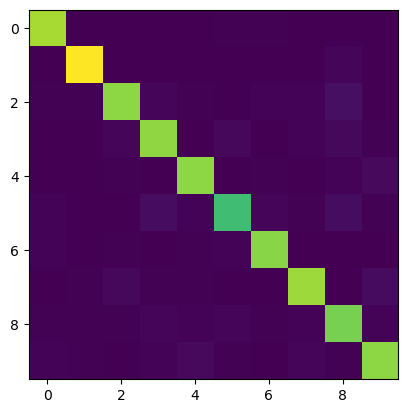

In [14]:
import sklearn.metrics

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

print('Acc = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true,y_pred,normalize=None)

plt.imshow(conf)
print(conf)

conf = sklearn.metrics.confusion_matrix(y_true,y_pred,normalize='true')
print(conf)

In [8]:
from keras.models import model_from_json

# Load the model architecture from JSON
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)

# Load the model weights
model.load_weights('model.h5')

print('Model and weights have been loaded successfully.')


Model and weights have been loaded successfully.


In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(108, 124, 3)
(1, 28, 28)
1/1 [==============================] - 0s 26ms/step
[[1.2929111e-16 4.5491182e-17 5.1023572e-09 9.9997699e-01 1.0744211e-13
  2.2975548e-05 2.8672607e-13 1.4586851e-10 1.6023516e-10 3.0211778e-10]]
Predicted Class: 3


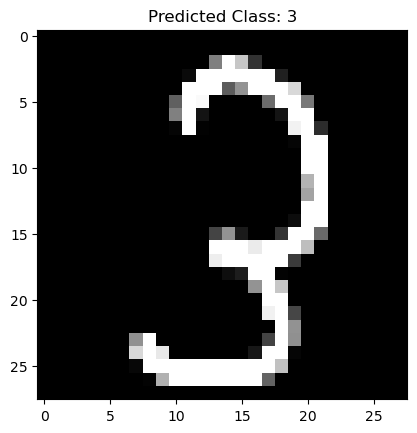

In [18]:
def get_image(image_path,model):
    img = cv.imread(image_path)
    print(img.shape)

    # convert to gray mode because its rgb
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # resize it because of inpute model our neural need (None , 28 , 28)
    img = cv.resize(img,(28,28))

    # our picture have white backgroung with black font we want to change it like our training set
    # that is why we change it we use code below
    img = 255 - img.astype(float)
    img /= 255
    # this code just for showing img notice dont use it after  np.expand_dim
#     plt.imshow(img,cmap='gray')

    # this code will add that None at first of shape we need None because our neural network need batch not just 1 image 
    img = np.expand_dims(img,axis=0)
    
    print(img.shape)

    prediction=model.predict(img)
    print(prediction)
    # Get the index (class) with the maximum probability
    predicted_class = np.argmax(prediction)

    print("Predicted Class:", predicted_class)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

image_path ='3.png'     
get_image(image_path,model)


(28, 28, 3)
(1, 28, 28)
1/1 [==============================] - 0s 31ms/step
[[5.3442268e-08 1.7648910e-13 2.6139332e-07 4.8936033e-10 9.9986780e-01
  3.3362472e-08 7.5814287e-06 7.0519302e-12 1.1944354e-04 4.7838189e-06]]
Predicted Class: 4


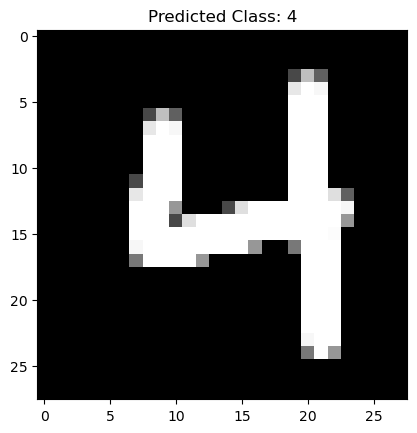

In [28]:
image_path ='4.png'     
get_image(image_path,model)

(28, 28, 3)
(1, 28, 28)
1/1 [==============================] - 0s 31ms/step
[[6.8757559e-05 2.3370634e-11 5.5267099e-02 7.1259323e-03 5.4157647e-07
  1.0012432e-04 2.2136678e-04 4.8905140e-13 9.3721610e-01 9.5000544e-08]]
Predicted Class: 8


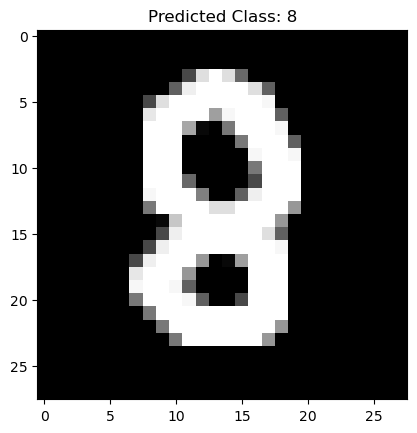

In [16]:
image_path ='8.png'     
get_image(image_path,model)

(28, 28, 3)
(1, 28, 28)
1/1 [==============================] - 0s 45ms/step
[[8.3683692e-03 1.4262459e-08 3.6339588e-02 5.0886042e-02 8.6607697e-04
  9.5533347e-03 3.6744973e-07 4.9259678e-01 3.5539514e-01 4.5994282e-02]]
Predicted Class: 7


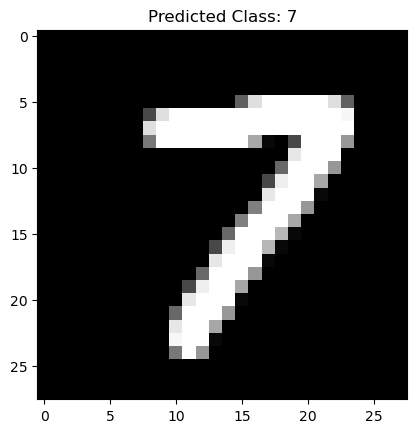

In [13]:
image_path ='7.png'     
get_image(image_path,model)

In [20]:
model_json = model.to_json()

# model to JSON
with open('model.json','w') as json_file:
    json_file.write(model_json)

# model  weights to HDF5
model.save_weights('model.h5','w')
print('Model has been saved')

Model has been saved


### finished 